In [1]:
# Sometimes the data may have too many variables such that most of the variables are correlated

#Model on the whole data => poor accuracy

# Soln- PCA

# Working principle of PCA - dimensionality reduction

# PCA - method of extracting important variables with a motive to capture as much info as possible
#     - extracts low dimensional set of variables from a high dimensional set

# Here we are not going to predict y
# The PCA unsupervised learning approach tries to learn the strength of relationship of varaiables

In [2]:
# Analysing eating habit, excercise habit and body shape

In [3]:
import pandas as pd

In [4]:
df=pd.DataFrame(columns=['Calory','Breakfast','Lunch','Dinner','Excercise','Body Shape'])

In [5]:
df.loc[0]=[1200,1,0,0,2,'Skinny']
df.loc[1]=[2800,1,1,1,1,'Fat']
df.loc[2]=[3500,2,2,1,0,'Skinny']
df.loc[3]=[1400,0,1,0,3,'Skinny']
df.loc[4]=[1600,1,0,2,0,'Normal']
df.loc[5]=[3200,1,2,1,1,'Fat']
df.loc[6]=[1750,1,0,0,1,'Skinny']
df.loc[7]=[1600,1,0,0,0,'Skinny']

In [6]:
df

,Calory,Breakfast,Lunch,Dinner,Excercise,Body Shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Fat
2,3500,2,2,1,0,Skinny
3,1400,0,1,0,3,Skinny
4,1600,1,0,2,0,Normal
5,3200,1,2,1,1,Fat
6,1750,1,0,0,1,Skinny
7,1600,1,0,0,0,Skinny


In [7]:
# Split feature vectors and labels
x=df[['Calory','Breakfast','Lunch','Dinner','Excercise']]
y=df[['Body Shape']]

In [8]:
x

,Calory,Breakfast,Lunch,Dinner,Excercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,1600,1,0,2,0
5,3200,1,2,1,1
6,1750,1,0,0,1
7,1600,1,0,0,0


In [9]:
y

,Body Shape
0,Skinny
1,Fat
2,Skinny
3,Skinny
4,Normal
5,Fat
6,Skinny
7,Skinny


In [10]:
# The mean of 'Calory' will be very high compared to the means of the other 4 columns....so we have to normalise it 
# Using StandardScaler (-1,1)

from sklearn.preprocessing import StandardScaler
x_std=StandardScaler().fit_transform(x)

In [11]:
x_std

array([[-1.11558076,  0.        , -0.90453403, -0.89802651,  1.        ],
       [ 0.80112175,  0.        ,  0.30151134,  0.53881591,  0.        ],
       [ 1.6396791 ,  2.        ,  1.50755672,  0.53881591, -1.        ],
       [-0.87599295, -2.        ,  0.30151134, -0.89802651,  2.        ],
       [-0.63640513,  0.        , -0.90453403,  1.97565832, -1.        ],
       [ 1.28029738,  0.        ,  1.50755672,  0.53881591,  0.        ],
       [-0.45671427,  0.        , -0.90453403, -0.89802651,  0.        ],
       [-0.63640513,  0.        , -0.90453403, -0.89802651, -1.        ]])

## Traditional method using Covariance matrix

In [12]:
# Covariance matrix of features

# Features are columns from x_std

import numpy as np
features=x_std.T
covariance_matrix=np.cov(features)
print(covariance_matrix)

#PCA believed that the points which have close cov or corr have more impact
#Eigen vector- the respected features....not suppressed

# .t means transform

[[ 1.14285714  0.71876344  0.99327861  0.50254343 -0.46206221]
 [ 0.71876344  1.14285714  0.34458439  0.4105264  -0.85714286]
 [ 0.99327861  0.34458439  1.14285714  0.30944592  0.        ]
 [ 0.50254343  0.4105264   0.30944592  1.14285714 -0.61578961]
 [-0.46206221 -0.85714286  0.         -0.61578961  1.14285714]]


In [13]:
# Eigen vectors and eigen values from co-variance matrix
eig_vals,eig_vecs=np.linalg.eig(covariance_matrix)

In [14]:
print('\nEigen values \n%s' %eig_vals)


Eigen values 
[3.27441798 1.45624642 0.76738755 0.04381948 0.17241429]


In [15]:
# Reduce dimension to 1 dimension
eig_vals[0]/sum(eig_vals)   #...... = 1st principal/performing component

0.5730231464377992

In [16]:
# Project datapoint onto selected eigen vector
projected_x=x_std.dot(eig_vecs.T[0])

In [17]:
projected_x   #.....The columns in the dataset has been converted into 1 influential column....represented on x-axis
              # since its unsupervised learning, the value of the y-axis is 0

array([ 1.71587119, -0.7519455 , -3.05488065,  2.52727084, -0.52643918,
       -1.46608726,  0.94310598,  0.61310459])

In [19]:
result=pd.DataFrame(projected_x,columns=['PC1'])   # PC1=Principal Component 1
result['y-axis']=0.0
result['label']=y
result

,PC1,y-axis,label
0,1.715871,0.0,Skinny
1,-0.751945,0.0,Fat
2,-3.054881,0.0,Skinny
3,2.527271,0.0,Skinny
4,-0.526439,0.0,Normal
5,-1.466087,0.0,Fat
6,0.943106,0.0,Skinny
7,0.613105,0.0,Skinny


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1, 'PCA result')

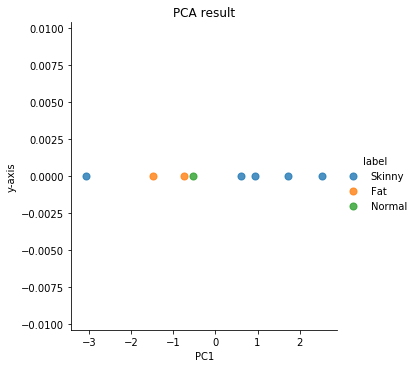

In [21]:
sns.lmplot('PC1','y-axis',data=result,fit_reg=False,scatter_kws={'s':50},hue='label')

#title
plt.title('PCA result')

# hue='label' .....unknown labels
# fit_reg.... fit regression

In [25]:
# In the above plot, the left side is for breakfast and lunch
# the right side is for dinner and exercise

# Even if you have low calorie intake, if u hv breakfast or lunch then the body shape will be FAT
# To be NORMAL, u should hv moderate values for all the independent variables in the original dataset
         #...since NORMAL is in the center
# Even if you have high calorie intake, if u hv dinner and excercise then the body shape will be SKINNY

### Trial 2 ....changing the value for NORMAL (Dinner)

In [19]:
df.loc[4]=[1600,1,0,10,0,'Normal']
df

,Calory,Breakfast,Lunch,Dinner,Excercise,Body Shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Fat
2,3500,2,2,1,0,Skinny
3,1400,0,1,0,3,Skinny
4,1600,1,0,10,0,Normal
5,3200,1,2,1,1,Fat
6,1750,1,0,0,1,Skinny
7,1600,1,0,0,0,Skinny


In [20]:
x=df[['Calory','Breakfast','Lunch','Dinner','Excercise']]
y=df[['Body Shape']]

In [21]:
x_std=StandardScaler().fit_transform(x)
x_std

array([[-1.11558076,  0.        , -0.90453403, -0.50795203,  1.        ],
       [ 0.80112175,  0.        ,  0.30151134, -0.19536617,  0.        ],
       [ 1.6396791 ,  2.        ,  1.50755672, -0.19536617, -1.        ],
       [-0.87599295, -2.        ,  0.30151134, -0.50795203,  2.        ],
       [-0.63640513,  0.        , -0.90453403,  2.61790663, -1.        ],
       [ 1.28029738,  0.        ,  1.50755672, -0.19536617,  0.        ],
       [-0.45671427,  0.        , -0.90453403, -0.50795203,  0.        ],
       [-0.63640513,  0.        , -0.90453403, -0.50795203, -1.        ]])

In [22]:
features=x_std.T
covariance_matrix=np.cov(features)
print(covariance_matrix)

[[ 1.14285714  0.71876344  0.99327861 -0.1180214  -0.46206221]
 [ 0.71876344  1.14285714  0.34458439  0.08931025 -0.85714286]
 [ 0.99327861  0.34458439  1.14285714 -0.2558165   0.        ]
 [-0.1180214   0.08931025 -0.2558165   1.14285714 -0.49120636]
 [-0.46206221 -0.85714286  0.         -0.49120636  1.14285714]]


In [23]:
eig_vals,eig_vecs=np.linalg.eig(covariance_matrix)

In [24]:
print('\nEigen values \n%s' %eig_vals)


Eigen values 
[2.88470922 1.8377202  0.77179288 0.04093904 0.17912438]


In [25]:
eig_vals[0]/sum(eig_vals)   #...... = 1st principal/performing component

0.5048241138434163

In [26]:
# Project datapoint onto selected eigen vector
projected_x=x_std.dot(eig_vecs.T[0])
projected_x

array([ 1.49117513, -0.58438792, -3.09912138,  2.34437184,  0.20184324,
       -1.38046809,  0.67737579,  0.34921138])

In [27]:
result=pd.DataFrame(projected_x,columns=['PC1'])   # PC1=Principal Component 1
result['y-axis']=0.0
result['label']=y
result

,PC1,y-axis,label
0,1.491175,0.0,Skinny
1,-0.584388,0.0,Fat
2,-3.099121,0.0,Skinny
3,2.344372,0.0,Skinny
4,0.201843,0.0,Normal
5,-1.380468,0.0,Fat
6,0.677376,0.0,Skinny
7,0.349211,0.0,Skinny


Text(0.5,1,'PCA result')

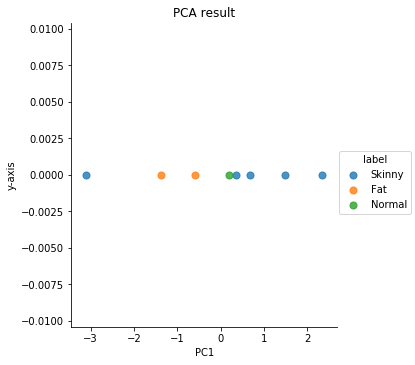

In [28]:
sns.lmplot('PC1','y-axis',data=result,fit_reg=False,scatter_kws={'s':50},hue='label')

#title
plt.title('PCA result')

# Here the point for NORMAL has shifted to the right since the value for dinner has increased

### Trial 3 ....changing the value for NORMAL (Excercise)

In [29]:
df.loc[4]=[1600,1,0,2,10,'Normal']
df

,Calory,Breakfast,Lunch,Dinner,Excercise,Body Shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Fat
2,3500,2,2,1,0,Skinny
3,1400,0,1,0,3,Skinny
4,1600,1,0,2,10,Normal
5,3200,1,2,1,1,Fat
6,1750,1,0,0,1,Skinny
7,1600,1,0,0,0,Skinny


In [30]:
x=df[['Calory','Breakfast','Lunch','Dinner','Excercise']]
y=df[['Body Shape']]
x_std=StandardScaler().fit_transform(x)
x_std

array([[-1.11558076,  0.        , -0.90453403, -0.89802651, -0.08137885],
       [ 0.80112175,  0.        ,  0.30151134,  0.53881591, -0.40689423],
       [ 1.6396791 ,  2.        ,  1.50755672,  0.53881591, -0.73240961],
       [-0.87599295, -2.        ,  0.30151134, -0.89802651,  0.24413654],
       [-0.63640513,  0.        , -0.90453403,  1.97565832,  2.52274422],
       [ 1.28029738,  0.        ,  1.50755672,  0.53881591, -0.40689423],
       [-0.45671427,  0.        , -0.90453403, -0.89802651, -0.40689423],
       [-0.63640513,  0.        , -0.90453403, -0.89802651, -0.73240961]])

In [31]:
features=x_std.T
covariance_matrix=np.cov(features)
print(covariance_matrix)

[[ 1.14285714  0.71876344  0.99327861  0.50254343 -0.44635073]
 [ 0.71876344  1.14285714  0.34458439  0.4105264  -0.27901319]
 [ 0.99327861  0.34458439  1.14285714  0.30944592 -0.4206282 ]
 [ 0.50254343  0.4105264   0.30944592  1.14285714  0.71827555]
 [-0.44635073 -0.27901319 -0.4206282   0.71827555  1.14285714]]


In [32]:
eig_vals,eig_vecs=np.linalg.eig(covariance_matrix)

In [33]:
print('\nEigen values \n%s' %eig_vals)


Eigen values 
[2.92782155 0.00730028 0.09687669 0.80768625 1.87460094]


In [48]:
eig_vals[0]/sum(eig_vals)   #...... = 1st principal/performing component

0.51236877077188625

In [34]:
# Project datapoint onto selected eigen vector
projected_x=x_std.dot(eig_vecs.T[0])
projected_x

array([ 1.39519059, -0.89909437, -3.04006475,  1.58489668,  0.94208338,
       -1.83784672,  0.9112362 ,  0.94359899])

In [35]:
result=pd.DataFrame(projected_x,columns=['PC1'])   # PC1=Principal Component 1
result['y-axis']=0.0
result['label']=y
result

,PC1,y-axis,label
0,1.395191,0.0,Skinny
1,-0.899094,0.0,Fat
2,-3.040065,0.0,Skinny
3,1.584897,0.0,Skinny
4,0.942083,0.0,Normal
5,-1.837847,0.0,Fat
6,0.911236,0.0,Skinny
7,0.943599,0.0,Skinny


Text(0.5,1,'PCA result')

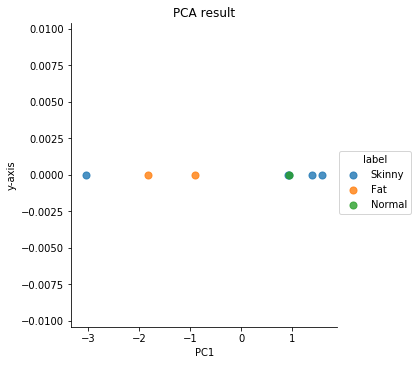

In [36]:
sns.lmplot('PC1','y-axis',data=result,fit_reg=False,scatter_kws={'s':50},hue='label')

#title
plt.title('PCA result')

# Here the point for NORMAL has shifted to the rightmost side since the value for Excercise has increased

### Trial 4 ....changing the value for NORMAL (Breakfast) 

In [52]:
df.loc[4]=[1600,10,0,2,0,'Normal']
x=df[['Calory','Breakfast','Lunch','Dinner','Excercise']]
y=df[['Body Shape']]
x_std=StandardScaler().fit_transform(x)
features=x_std.T
covariance_matrix=np.cov(features)
eig_vals,eig_vecs=np.linalg.eig(covariance_matrix)
print('\nEigen values \n%s' %eig_vals)
eig_vals[0]/sum(eig_vals)   #...... = 1st principal/performing component


Eigen values 
[ 2.7989399   2.15420829  0.68446718  0.01128646  0.06538388]


0.48981448322734844

In [53]:
projected_x=x_std.dot(eig_vecs.T[0])
result=pd.DataFrame(projected_x,columns=['PC1'])   # PC1=Principal Component 1
result['y-axis']=0.0
result['label']=y
result

,PC1,y-axis,label
0,1.917312,0.0,Skinny
1,-0.629416,0.0,Fat
2,-1.978506,0.0,Skinny
3,2.033255,0.0,Skinny
4,-2.025566,0.0,Normal
5,-1.218647,0.0,Fat
6,1.145361,0.0,Skinny
7,0.756206,0.0,Skinny


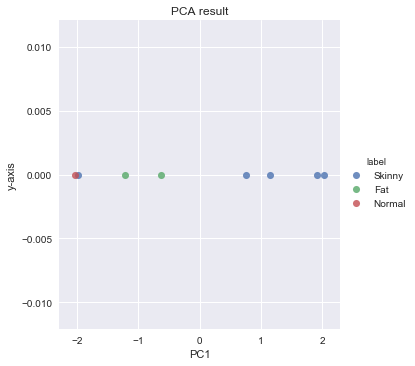

In [54]:
sns.lmplot('PC1','y-axis',data=result,fit_reg=False,scatter_kws={'s':50},hue='label')

#title
plt.title('PCA result')

# Here the point for NORMAL has shifted to the leftmost side since the value for Breakfast has increased